## Actividad 5_V2

**Punto 9 de la actividad 5. Hacemos un data frame con la info del punto 7 para todas las galaxias de la simulación con masa mayor a 1e10**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import Curves2D

In [2]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 07/' 
# path_win =

Cargamos la tabla de datos que descargamos:

In [3]:
# columnas = ['GalaxyID','GroupID','CentreOfPotential_x','CentreOfPotential_y','CentreOfPotential_z','Stars_Mass','HalfMassRad_Star']

In [4]:
table   = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')#,usecols=columnas)#,index_col='GalaxyID')
table

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0       9498012  28000000000002       28  2.220446e-16               6   
1       9508202  28000000000002       28  2.220446e-16               7   
2       9512113  28000000000002       28  2.220446e-16               8   
3       9517736  28000000000002       28  2.220446e-16               9   
4       9519365  28000000000002       28  2.220446e-16              10   
...         ...             ...      ...           ...             ...   
13295   4317555  28000100003223       28  2.220446e-16               0   
13296   4710749  28000100004466       28  2.220446e-16               0   
13297   5387790  28000200000262       28  2.220446e-16               0   
13298   6104686  28000200004222       28  2.220446e-16               0   
13299  61518775  28000900002358       28  2.220446e-16               0   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                 8.913222            35.828056            54.839039   
1                 6.904262            35.705917            57.397373   
2                 8.682913            35.504921            54.217369   
3                 8.278317            37.063808            54.914932   
4                 8.262937            36.454063            55.901993   
...                    ...                  ...                  ...   
13295            17.477247            79.643379            54.909241   
13296            58.681110            84.345787            24.601583   
13297            70.492355             5.389233            91.000664   
13298            12.975779            81.673553            52.292992   
13299             8.211574            76.852783            48.471100   

         Stars_Mass       SF_Mass  ...  NSF_Hydrogen  NSF_Oxygen  \
0      1.538708e+11  0.000000e+00  ...      0.000000    0.000000   
1      7.604099e+10  2.281596e+09  ...      0.727174    0.004796   
2      1.345128e+11  1.514760e+10  ...      0.696796    0.010628   
3      2.232997e+10  2.754609e+09  ...      0.714222    0.007443   
4      4.833353e+10  0.000000e+00  ...      0.000000    0.000000   
...             ...           ...  ...           ...         ...   
13295  2.390242e+09  0.000000e+00  ...      0.000000    0.000000   
13296  1.280501e+09  3.723092e+08  ...      0.738459    0.002793   
13297  1.631883e+09  4.478066e+08  ...      0.734583    0.003821   
13298  2.849959e+09  0.000000e+00  ...      0.000000    0.000000   
13299  1.009073e+09  0.000000e+00  ...      0.000000    0.000000   

       NSF_Metallicity  StarFormationRate  InitialMassWeightedStellarAge  \
0             0.000000           0.000000                      10.139413   
1             0.011342           0.841832                       9.455478   
2             0.024796          12.094972                       7.656161   
3             0.017283           1.334875                       8.117089   
4             0.000000           0.000000                       8.520104   
...                ...                ...                            ...   
13295         0.000000           0.000000                       8.292501   
13296         0.006326           0.140465                       6.375748   
13297         0.008329           0.148282                       5.915991   
13298         0.000000           0.000000                       9.001393   
13299         0.000000           0.000000                      10.406497   

       ApertureSize     Mass_Star  SFR_30pkpc  Group_R_Crit200  \
0                30  1.307842e+11    0.000000      1411.312012   
1                30  6.641890e+10    0.823222      1411.312012   
2                30  1.183275e+11   10.984530      1411.312012   
3                30  2.024596e+10    1.322288      1411.312012   
4                30  3.944613e+10    0.000000      1411.312012   
...             ...           ...         ...              ...   
13295            30  2.374284e+09    0.000000        89.33797

In [5]:
table_a = table[(table['Stars_Mass']>=1e9)].copy()
table_a['log(O_H)'] = 12+np.log10(table_a['SF_Oxygen']/table_a['SF_Hydrogen'])-np.log10(16)

In [6]:
table_a

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
0       9498012  28000000000002       28  2.220446e-16               6   
1       9508202  28000000000002       28  2.220446e-16               7   
2       9512113  28000000000002       28  2.220446e-16               8   
3       9517736  28000000000002       28  2.220446e-16               9   
4       9519365  28000000000002       28  2.220446e-16              10   
...         ...             ...      ...           ...             ...   
13295   4317555  28000100003223       28  2.220446e-16               0   
13296   4710749  28000100004466       28  2.220446e-16               0   
13297   5387790  28000200000262       28  2.220446e-16               0   
13298   6104686  28000200004222       28  2.220446e-16               0   
13299  61518775  28000900002358       28  2.220446e-16               0   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
0                 8.913222            35.828056            54.839039   
1                 6.904262            35.705917            57.397373   
2                 8.682913            35.504921            54.217369   
3                 8.278317            37.063808            54.914932   
4                 8.262937            36.454063            55.901993   
...                    ...                  ...                  ...   
13295            17.477247            79.643379            54.909241   
13296            58.681110            84.345787            24.601583   
13297            70.492355             5.389233            91.000664   
13298            12.975779            81.673553            52.292992   
13299             8.211574            76.852783            48.471100   

         Stars_Mass       SF_Mass  ...  NSF_Oxygen  NSF_Metallicity  \
0      1.538708e+11  0.000000e+00  ...    0.000000         0.000000   
1      7.604099e+10  2.281596e+09  ...    0.004796         0.011342   
2      1.345128e+11  1.514760e+10  ...    0.010628         0.024796   
3      2.232997e+10  2.754609e+09  ...    0.007443         0.017283   
4      4.833353e+10  0.000000e+00  ...    0.000000         0.000000   
...             ...           ...  ...         ...              ...   
13295  2.390242e+09  0.000000e+00  ...    0.000000         0.000000   
13296  1.280501e+09  3.723092e+08  ...    0.002793         0.006326   
13297  1.631883e+09  4.478066e+08  ...    0.003821         0.008329   
13298  2.849959e+09  0.000000e+00  ...    0.000000         0.000000   
13299  1.009073e+09  0.000000e+00  ...    0.000000         0.000000   

       StarFormationRate  InitialMassWeightedStellarAge  ApertureSize  \
0               0.000000                      10.139413            30   
1               0.841832                       9.455478            30   
2              12.094972                       7.656161            30   
3               1.334875                       8.117089            30   
4               0.000000                       8.520104            30   
...                  ...                            ...           ...   
13295           0.000000                       8.292501            30   
13296           0.140465                       6.375748            30   
13297           0.148282                       5.915991            30   
13298           0.000000                       9.001393            30   
13299           0.000000                      10.406497            30   

          Mass_Star  SFR_30pkpc  Group_R_Crit200  Group_M_Crit200  log(O_H)  
0      1.307842e+11    0.000000      1411.312012     3.002119e+14       NaN  
1      6.641890e+10    0.823222      1411.312012     3.002119e+14  9.079824  
2      1.183275e+11   10.984530      1411.312012     3.002119e+14  9.246274  
3      2.024596e+10    1.322288      1411.312012     3.002119e+14  9.050028  
4      3.944613e+10    0.000000      1411.312012     3.002119e+14       NaN  
...             ...         ...              ...       

In [7]:
# n = 2                              #Como prueba tomo los primeros 50 valores de la tabla
long = len(table_a)                    #Acá tomo todas las galáxias mayores a 1e10 masas solares para armarnos la tabla del punto 7
     
data = {'GalaxyID_test':[],'Mass_Host':[],'SubGroupNumber':[],'GroupID_test':[],'GalaxyID_V1':[],'GalaxyID_V2':[],'R_1[kpc]':[],'R_2[kpc]':[],'r_sep_1':[],'r_sep_2':[],
        'mu_1':[],'mu_2':[],'N_1':[],'N_2':[],'N_3':[]}#Defino las columnas de output
DATA_TEMP = pd.DataFrame(data=data)

for i in np.arange(long):
    
    mask    = (table_a['GalaxyID']==int(table_a['GalaxyID'].to_numpy()[i]))  #usamos como máscara la galáxia i-ésima de la table_a
    G_test  = float(table_a['Stars_Mass'][mask])                              #masa de la galáxia
    x_test  = float(table_a['CentreOfPotential_x'][mask])                     #nos guardamos su posición
    y_test  = float(table_a['CentreOfPotential_y'][mask])
    z_test  = float(table_a['CentreOfPotential_z'][mask])
    
    table_b = table_a[((table_a['Stars_Mass']/G_test)>0.1)].copy() #tabla para masas acotadas respecto de la i-ésima
    
    table_b['Distancias_test'] = np.sqrt( (table_b['CentreOfPotential_x'].to_numpy()-x_test)**2
                                         +(table_b['CentreOfPotential_y'].to_numpy()-y_test)**2
                                         +(table_b['CentreOfPotential_z'].to_numpy()-z_test)**2)    #Nueva columna que tiene las distancias a la i-ésima. En kpc
    
    table_b = table_b.sort_values(by=['Distancias_test'],ascending=True)
    
    N_1 = len(table_b[(table_b['Distancias_test']<=1)])-1
    N_2 = len(table_b[(table_b['Distancias_test']<=2)])-1
    N_3 = len(table_b[(table_b['Distancias_test']<=3)])-1
    
    r_sep_1= (table_b['Distancias_test'].to_numpy()[1]*1000)/((table_b['HalfMassRad_Star'].to_numpy()[0])+(table_b['HalfMassRad_Star'].to_numpy()[1])) 
    r_sep_2= (table_b['Distancias_test'].to_numpy()[2]*1000)/((table_b['HalfMassRad_Star'].to_numpy()[0])+(table_b['HalfMassRad_Star'].to_numpy()[2]))
    
    
    mu_1 = table_b['Stars_Mass'].to_numpy()[1]/table_b['Stars_Mass'].to_numpy()[0]
    mu_2 = table_b['Stars_Mass'].to_numpy()[2]/table_b['Stars_Mass'].to_numpy()[0]
    
#     vecinos = len(N_2)-1
    
    data = {'GalaxyID_test':table_b['GalaxyID'].to_numpy()[0],'Mass_Host':G_test,'SubGroupNumber':table_b['SubGroupNumber'].to_numpy()[0],
            'GroupID_test':table_b['GroupID'].to_numpy()[0],'GalaxyID_V1':table_b['GalaxyID'].to_numpy()[1],
            'GalaxyID_V2':table_b['GalaxyID'].to_numpy()[2],'R_1[kpc]':table_b['Distancias_test'].to_numpy()[1]*1000,
            'R_2[kpc]':table_b['Distancias_test'].to_numpy()[2]*1000,'r_sep_1':r_sep_1,'r_sep_2':r_sep_2,
            'mu_1':mu_1,'mu_2':mu_2,'N_1':N_1,'N_2':N_2,'N_3':N_3}
    
    DATA_TEMP = DATA_TEMP.append(data,ignore_index=True)
    
    print('Porcentaje:',round(float((i+1)/long),3),end='\r')

DATA_TEMP = DATA_TEMP.astype({'GalaxyID_test':int,'Mass_Host':float,'SubGroupNumber':int,'GroupID_test':int,'GalaxyID_V1':int,
                    'GalaxyID_V2':int,'R_1[kpc]':float,'R_2[kpc]':float,'r_sep_1':float,
                     'r_sep_2':float,'mu_1':float,'mu_2':float,'N_1':int,'N_2':int,'N_3':int})      #Cambiamos el tipo de dato por columna
        

Imprimimos la tabla para ver que todo está bien:

In [8]:
DATA_TEMP.sort_values(by=['N_2'],ascending=False).head(50)

GalaxyID_test     Mass_Host  SubGroupNumber    GroupID_test  \
3511        2699630  1.284542e+09             336  28000000000001   
3758        2680755  1.692299e+09             237  28000000000001   
4222        2667359  2.644178e+09             189  28000000000001   
4496        2661640  4.969416e+09             174  28000000000001   
2576       56106504  1.302492e+09             415  28000000000001   
2565       56111892  1.296391e+09             527  28000000000001   
4909        9496486  8.952231e+09              98  28000000000001   
3522        2693395  2.295047e+09             299  28000000000001   
3533        2692540  1.262103e+09             295  28000000000001   
4224        2668095  1.919410e+09             192  28000000000001   
3532        2692297  1.297591e+09             293  28000000000001   
2579       56107102  1.702086e+09             432  28000000000001   
2872       56104582  3.249739e+09             371  28000000000001   
4217        2669838  2.445420e+09             198  28000000000001   
4500        2657806  2.402137e+09             165  28000000000001   
4502        2658617  1.355031e+09             167  28000000000001   
4206        2675509  2.015312e+09             218  28000000000001   
4510        2657144  1.610571e+09             163  28000000000001   
4686        2638766  6.852012e+09             120  28000000000001   
2871       56104259  2.415334e+09             354  28000000000001   
2874       56105436  2.241216e+09             390  28000000000001   
3536        2687745  4.026859e+09             269  28000000000001   
2566       56112494  1.298512e+09             534  28000000000001   
2879       56101134  6.225998e+09             257  28000000000001   
3763        2677203  6.416668e+09             224  28000000000001   
4506        2655358  3.600475e+09             159  28000000000001   
2878       56099342  8.009956e+09             211  28000000000001   
4677        2645304  4.998686e+09             135  28000000000001   
3760        2681202  2.353588e+09             239  28000000000001   
3762        2676801  6.962917e+09             223  28000000000001   
3517        2696763  2.188935e+09             318  28000000000001   
4499        2657436  1.942733e+09             164  28000000000001   
2568       56107299  3.437056e+09             435  28000000000001   
4230        2664957  4.696117e+09             181  28000000000001   
4209        2671252  5.061480e+09             203  28000000000001   
3535        2687246  2.700203e+09             267  28000000000001   
3749        2681529  3.383690e+09             240  28000000000001   
4229        2664439  8.738369e+09             180  28000000000001   
2873       56104926  2.725615e+09             389  28000000000001   
3524        2694345  1.637458e+09             304  28000000000001   
2564       56111499  1.704715e+09             519  28000000000001   
2575       56106142  2.708636e+09             412  28000000000001   
2580       56102785  3.717655e+09             345  28000000000001   
4208        2670936  4.440284e+09             202  28000000000001   
3121        2707067  1.255863e+09             387  28000000000001   
2875       56105650  1.998208e+09             406  28000000000001   
4684        2642936  1.201897e+10             130  28000000000001   
3528        2689963  1.458826e+09             280  28000000000001   
4671        2647906  7.332877e+09             141  28000000000001   
2560       56113531  1.393557e+09             550  28000000000001   

      GalaxyID_V1  GalaxyID_V2    R_1[kpc]    R_2[kpc]    r_sep_1    r_sep_2  \
3511      2657436      8242261  205.155747  468.924389  25.822088  61.268279   
3758     56106504      2693395   72.385231  111.829443   7.555717  10.967631   
4222     56107102      2675509  248.357532  257.085979  29.623927  27.650701   
4496      2681202      2657806  160.982807  201.293233  21.130108  24.257931   
2576      2680755      2693395   72.385231  142.711909   7.555717  13.264190   
2565  

También podemos oredenarlas por la cantidad de vecinos que tengan:

In [9]:
DATA = DATA_TEMP[(DATA_TEMP['Mass_Host']>=1e10)].copy() # En éste caso son las 20 con mayor cantidad de vecinos
# DATA = DATA_TEMP.copy()

In [50]:
DATA.sort_values(by=['r_sep_1'],ascending=True).head(32)

GalaxyID_test     Mass_Host  SubGroupNumber    GroupID_test  \
1915         3436883  2.750044e+10              49  28000000000002   
5534         9479185  3.579624e+10              62  28000000000001   
3119         8230966  2.597250e+10              14  28000000000001   
1916         3456595  2.561529e+10              50  28000000000002   
5429           65695  1.466019e+10             151  28000000000000   
7582        10586237  1.146429e+11               9  28000000000003   
116                1  5.515596e+10              42  28000000000000   
1194         4476932  2.226171e+10              41  28000000000004   
8566        10736949  1.946549e+10              11  28000000000006   
4232         2659779  1.124230e+10             170  28000000000001   
3385         6004914  5.136619e+10               5  28000000000014   
3239        20845348  4.386264e+11               0  28000000000014   
2407         4513778  3.367648e+10              13  28000000000005   
3386         6022577  2.682798e+10               9  28000000000014   
8563        19182761  4.086196e+11               0  28000000000006   
3162        19835441  2.674612e+11               0  28000000000065   
3163          197363  4.184187e+10               3  28000000000065   
6147         1745905  1.314341e+10               2  28000000000188   
2389         6077306  1.319554e+10              15  28000000000017   
2279         6659446  1.154251e+10              12  28000000000025   
12957       17906044  7.899277e+10               1  28000000000074   
12960         247997  1.093689e+10              10  28000000000074   
2138         7694028  1.048249e+10              13  28000000000054   
5416        16253921  5.713987e+10               0  28000000000396   
4640        18426227  1.641784e+10               0  28000000001038   
6977        17873830  2.959372e+10               0  28000000000808   
3882         8617277  1.648348e+10               1  28000000000652   
5795           50758  1.815444e+10             122  28000000000000   
2075         8077031  6.978556e+10              14  28000000000000   
7370        18391952  2.404136e+10               0  28000000001011   
8917         2389392  2.077552e+10               2  28000000000357   
8916        16069544  7.660673e+10               0  28000000000357   

       GalaxyID_V1  GalaxyID_V2    R_1[kpc]     R_2[kpc]   r_sep_1  \
1915      21573586      3456595   22.942313    55.859011  0.151136   
5534       8230966      9463307   11.184914   139.386169  0.160178   
3119       9479185      9463307   11.184914   130.458382  0.160178   
1916      21573586      3436883   42.418175    55.859011  0.276193   
5429      21109760     49625735   26.003203    48.872385  0.332458   
7582      21730535      3550457   58.006158    99.999166  0.444520   
116       21242350     49621513   38.289019    67.955073  0.501191   
1194      21924775      4461431   82.834927    90.760645  0.502380   
8566      19182761      4581820  163.510929   196.841709  0.505181   
4232      21379521     56099342  114.649851   127.184893  0.547751   
3385      20845348      6022577   35.300091    73.481562  0.589914   
3239       6004914     11540307   35.300091   180.660397  0.589914   
2407      21986361      4539985   54.493354   127.689311  0.653350   
3386      20845348     63883932   39.383884    43.389713  0.653477   
8563      10705994     10728997  219.577078   566.649434  0.671616   
3162        197363     13198688   27.675192   671.043091  0.729907   
3163      19835441       210843   27.675192   246.987228  0.729907   
6147      14687754     55574027   16.172427    46.808127  0.759637   
2389      20943532      6076300   41.417773    67.476368  0.792272   
2279      18737995      6650953   33.995681    75.085127  0.821435   
12957       247997       246799   10.322870    81.423256  0.829072   
12960     17906044       246799   10.322870    72.778085  0.829072   
2138      19507560      7692117   17.435645   183.204846  1.020658   
5416       24366

In [11]:
# DATA.to_csv(path_or_buf='Actividad_5_v2_Parte_2_modificacion_12_10_22.dat',index=False)   # Nos guardamos los datos

## Scatter plots de una galaxia central junto con las que se encuantran a menos de 2Mpc

Tomamos el GalaxyID de la galáxia central que queremos graficar, que podemos sacarlo de la tabla DATA de arriba:

In [59]:
GalaxyID_test = 8077031

In [60]:
mask = (table_a['GalaxyID']== GalaxyID_test)

G_test = float(table_a['Stars_Mass'][mask])

xmax = table_a['CentreOfPotential_x'][mask]
ymax = table_a['CentreOfPotential_y'][mask]
zmax = table_a['CentreOfPotential_z'][mask]

table_b = table_a[((table_a['Stars_Mass']/G_test)>0.01)].copy()

table_b['Distancias_test'] = np.sqrt((table_b['CentreOfPotential_x']-float(xmax))**2
                                    +(table_b['CentreOfPotential_y']-float(ymax))**2
                                    +(table_b['CentreOfPotential_z']-float(zmax))**2)

N_2 = table_b[(table_b['Distancias_test']<=2)].sort_values(by=['Distancias_test'],ascending=True).copy()

In [61]:
N_2

GalaxyID         GroupID  SnapNum      Redshift  SubGroupNumber  \
2075    8077031  28000000000000       28  2.220446e-16              14   
5795      50758  28000000000000       28  2.220446e-16             122   
143    49626687  28000000000000       28  2.220446e-16             398   
5800      47679  28000000000000       28  2.220446e-16             114   
419      105260  28000000000000       28  2.220446e-16             322   
...         ...             ...      ...           ...             ...   
1042    8153607  28000000000000       28  2.220446e-16              69   
10710  11974933  28000000004199       28  2.220446e-16               0   
2064    8109570  28000000000000       28  2.220446e-16              27   
5446      62812  28000000000000       28  2.220446e-16             144   
5439      64986  28000000000000       28  2.220446e-16             149   

       CentreOfPotential_x  CentreOfPotential_y  CentreOfPotential_z  \
2075             10.711639            81.017921            54.754261   
5795             10.698622            81.020218            54.748753   
143              10.694964            80.990814            54.745617   
5800             10.636914            80.810326            54.672546   
419              10.737920            81.001335            54.473568   
...                    ...                  ...                  ...   
1042             12.191707            79.949585            54.254990   
10710            10.126694            82.603027            55.621754   
2064             12.229099            81.499496            53.669861   
5446             12.491581            80.273323            55.018116   
5439             12.311442            80.893097            53.634850   

         Stars_Mass       SF_Mass  ...  NSF_Metallicity  StarFormationRate  \
2075   6.978556e+10  2.796792e+09  ...         0.019287           1.600926   
5795   1.815444e+10  3.620322e+09  ...         0.009496           3.202879   
143    2.095248e+09  0.000000e+00  ...         0.000000           0.000000   
5800   5.305231e+09  5.773503e+08  ...         0.048416           0.284651   
419    1.746314e+09  0.000000e+00  ...         0.000000           0.000000   
...             ...           ...  ...              ...                ...   
1042   1.841103e+10  0.000000e+00  ...         0.078286           0.000000   
10710  1.203475e+09  1.139631e+09  ...         0.002639           0.515408   
2064   3.685937e+10  9.450095e+08  ...         0.082324           0.544929   
5446   1.018014e+09  7.280710e+07  ...         0.007472           0.025608   
5439   1.876348e+09  0.000000e+00  ...         0.000000           0.000000   

       InitialMassWeightedStellarAge  ApertureSize     Mass_Star  SFR_30pkpc  \
2075                        7.737696            30  5.883956e+10    0.904586   
5795                        8.088115            30  1.815444e+10    3.202879   
143                         8.145159            30  2.095248e+09    0.000000   
5800                        7.781157            30  5.264691e+09    0.284651   
419                        10.312291            30  1.736573e+09    0.000000   
...                              ...           ...           ...         ...   
1042                        8.465010            30  1.818370e+10    0.000000   
10710                       5.468887            30  1.177721e+09    0.515408   
2064                        6.574261            30  3.287183e+10    0.544929   
5446                        7.796265            30  1.011369e+09    0.025608   
5439                        8.699688            30  1.825791e+09    0.000000   

       Group_R_Crit200  Group_M_Crit200  log(O_H)  Distancias_test  
2075       1205.522461     1.870964e+14  9.063413         0.000000  
5795       1205.522461     1.870964e+14  9.229329         0.014320  
143        1205.522461     1.870964e+14       NaN         0.032978  
5800       1205.522461     1.870964e+14  9.316228         0.235281  
419       

**Eje x-y del C.O.P**

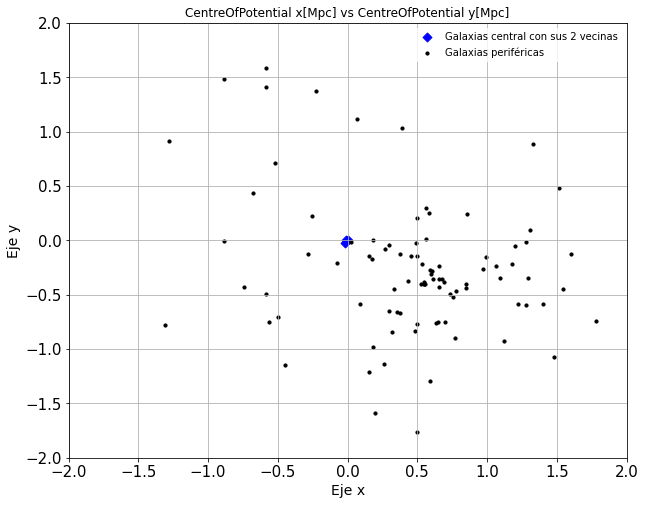

In [62]:

eje_1 = 'x'
eje_2 = 'y'

fig,ax=plt.subplots(figsize=(10,8))

xvar_1= (N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax))
yvar_1= (N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(ymax))

xvar_2= (N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax))
yvar_2= (N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(ymax))


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[Mpc] vs CentreOfPotential '+eje_2+'[Mpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje x-z del C.O.P**

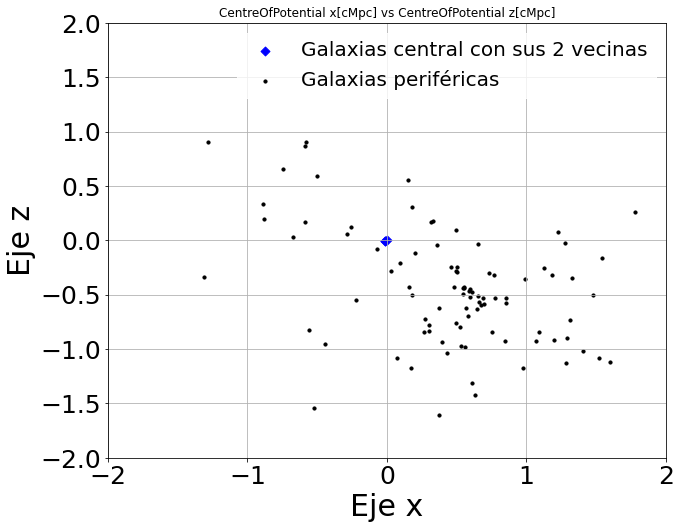

In [63]:
eje_1 = 'x'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(10,8))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(xmax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(xmax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)


ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=30)
ax.set_ylabel(ylabel,fontsize=30)

ax.tick_params(axis='both',labelsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=20)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

**Eje y-z del C.O.P**

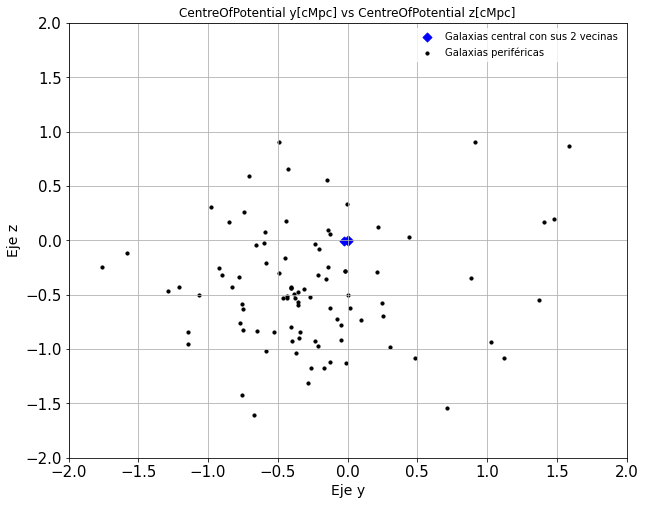

In [64]:
eje_1 = 'y'
eje_2 = 'z'

fig,ax=plt.subplots(figsize=(10,8))

xvar_1= N_2['CentreOfPotential_'+eje_1].iloc[0:3]-float(ymax)
yvar_1= N_2['CentreOfPotential_'+eje_2].iloc[0:3]-float(zmax)

xvar_2= N_2['CentreOfPotential_'+eje_1].iloc[3:]-float(ymax)
yvar_2= N_2['CentreOfPotential_'+eje_2].iloc[3:]-float(zmax)

ax.scatter(xvar_1,yvar_1,marker='D',s=40,c='b',label='Galaxias central con sus 2 vecinas')
ax.scatter(xvar_2,yvar_2,marker='o',s=10,c='k',label='Galaxias periféricas')

xlim=(-2,2)
ylim=(-2,2)

xlabel= 'Eje '+eje_1
ylabel= 'Eje '+eje_2

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.tick_params(axis='both',labelsize=15)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.title('CentreOfPotential '+eje_1+'[cMpc] vs CentreOfPotential '+eje_2+'[cMpc]')

# plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

leg = plt.legend(loc='upper right',edgecolor='w',fontsize=10)
#leg.set_title('Primeras dos vecinas', prop = {'size':15})


# plt.axis('scaled')#Escalea los ejes para que no se deforme el plano

plt.grid(True)
# plt.savefig('CentreOfPotential_y_vs_CentreOfPotential_x_(z=0).png')
plt.show()

In [65]:
def spheres(size, clr, x, y, z): 
    
    # Set up 100 points. First, do angles
    theta = np.linspace(0,2*np.pi,100)
    phi = np.linspace(0,np.pi,100)
    
    # Set up coordinates for points on the sphere
    x0 = x + size * np.outer(np.cos(theta),np.sin(phi))
    y0 = y + size * np.outer(np.sin(theta),np.sin(phi))
    z0 = z + size * np.outer(np.ones(100),np.cos(phi))
    
    # Set up trace
    trace= go.Surface(x=x0, y=y0, z=z0, colorscale=[[0,clr], [1,clr]])
    trace.update(showscale=False)

    return trace

**Ploteo en 3D**

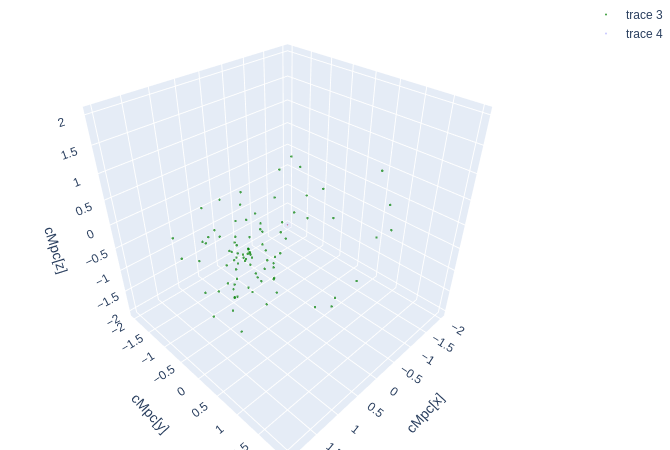

In [80]:
### GalaxyID de la galaxia central con sus dos primeras vecinas

ID_host = GalaxyID_test
ID_V1   = DATA['GalaxyID_V1'][(DATA['GalaxyID_test'] == GalaxyID_test)].values[0]
ID_V2   = DATA['GalaxyID_V2'][(DATA['GalaxyID_test'] == GalaxyID_test)].values[0]

xvar  = N_2['CentreOfPotential_x'].iloc[0]-float(xmax)
yvar  = N_2['CentreOfPotential_y'].iloc[0]-float(ymax)
zvar  = N_2['CentreOfPotential_z'].iloc[0]-float(zmax)
R     = table_a['HalfMassRad_Star'][(table_a['GalaxyID'] == ID_host)].values[0]/1000

xvar_1= N_2['CentreOfPotential_x'].iloc[1]-float(xmax)
yvar_1= N_2['CentreOfPotential_y'].iloc[1]-float(ymax)
zvar_1= N_2['CentreOfPotential_z'].iloc[1]-float(zmax)
R_1   = table_a['HalfMassRad_Star'][(table_a['GalaxyID'] == ID_V1)].values[0]/1000

xvar_2= N_2['CentreOfPotential_x'].iloc[2]-float(xmax)
yvar_2= N_2['CentreOfPotential_y'].iloc[2]-float(ymax)
zvar_2= N_2['CentreOfPotential_z'].iloc[2]-float(zmax)
R_2   = table_a['HalfMassRad_Star'][(table_a['GalaxyID'] == ID_V2)].values[0]/1000

xvar_3= N_2['CentreOfPotential_x'].iloc[3:]-float(xmax)
yvar_3= N_2['CentreOfPotential_y'].iloc[3:]-float(ymax)
zvar_3= N_2['CentreOfPotential_z'].iloc[3:]-float(zmax)

lim_mega = 2 #Distancia en Mpc
x_lim = [-lim_mega,lim_mega]
y_lim = [-lim_mega,lim_mega]
z_lim = [-lim_mega,lim_mega]

fig = go.Figure(data=[ spheres(R,'red',xvar,yvar,zvar)
                      ,spheres(R_1,'blue',xvar_1,yvar_1,zvar_1)
                      ,spheres(R_2,'blue',xvar_2,yvar_2,zvar_2)
                      ,go.Scatter3d(
                                    x=xvar_3,
                                    y=yvar_3,
                                    z=zvar_3,
                                    mode='markers',
                                    marker=dict(
                                    size=0.8,
                                    color='green',
                                    opacity=0.7KdenliveKdenliveKdenliveKdenliveKdenlive))
                      ,go.Scatter3d(
                                    x=x_lim,
                                    y=y_lim,
                                    z=z_lim,
                                    mode='markers',
                                    marker=dict(
                                    size=0,
                                    color='blue',
                                    opacity=0.01))
                                                   ])

# tight layout
fig.update_layout(scene = dict(
                    xaxis_title='cMpc[x]',
                    yaxis_title='cMpc[y]',
                    zaxis_title='cMpc[z]'),
                    width=70,
                    margin =dict(l=0, r=0, b=0, t=0))



fig.show()


In [36]:
R

0.0031129763126373287

In [38]:
ID_V1[0]

14978115

In [36]:
table_a['HalfMassRad_Star']

1          5.646945
2          8.825949
3          4.576159
24         9.463099
25       149.868179
            ...    
13292      4.124651
13293      2.801872
13294      3.654845
13296      3.716805
13297      6.105383
Name: HalfMassRad_Star, Length: 10401, dtype: float64

## 11) Para la muestra C, realizar histrogramas de r1, r2, rsep2, μBGT y N2

In [44]:
R_1 = DATA['R_1']
R_2 = DATA['R_2']

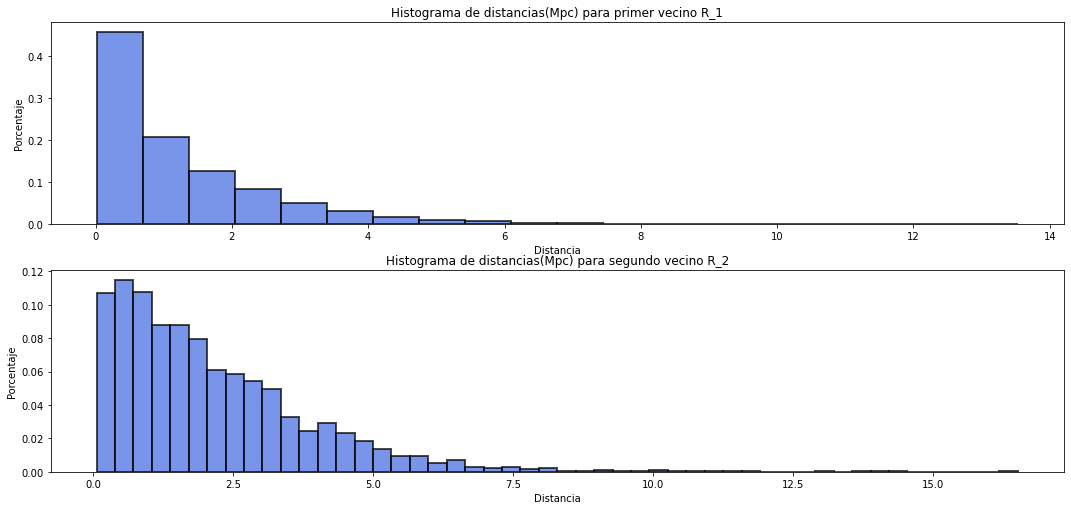

In [45]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(R_1)
xmax = np.max(R_1)

weights=np.ones_like(R_1)/float(len(R_1))
axes[0].hist(R_1,bins=20,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma de distancias(Mpc) para primer vecino R_1')
axes[0].set_xlabel('Distancia')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(R_2)
xmax = np.max(R_2)

weights=np.ones_like(R_2)/float(len(R_2))
axes[1].hist(R_2,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma de distancias(Mpc) para segundo vecino R_2')
axes[1].set_xlabel('Distancia')
axes[1].set_ylabel('Porcentaje')


plt.savefig('Histograma_distancias.png')


plt.show()

In [46]:
var_1 = DATA['r_sep_1']
var_2 = DATA['r_sep_2']

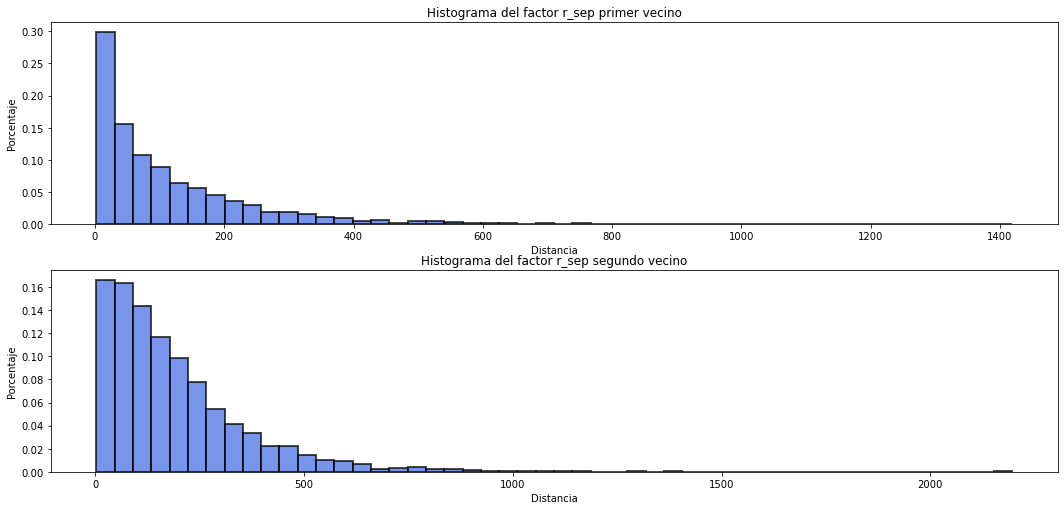

In [47]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes[0].hist(var_1,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma del factor r_sep primer vecino')
axes[0].set_xlabel('Distancia')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(var_2)
xmax = np.max(var_2)

weights=np.ones_like(var_2)/float(len(var_2))
axes[1].hist(var_2,bins=50,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma del factor r_sep segundo vecino')
axes[1].set_xlabel('Distancia')
axes[1].set_ylabel('Porcentaje')

plt.savefig('Histograma_r_sep.png')


plt.show()

In [20]:
mask_1 = (DATA['mu_1']<20)
mask_2 = (DATA['mu_2']<20)

var_1 = DATA['mu_1'][mask_1]
var_2 = DATA['mu_2'][mask_2]

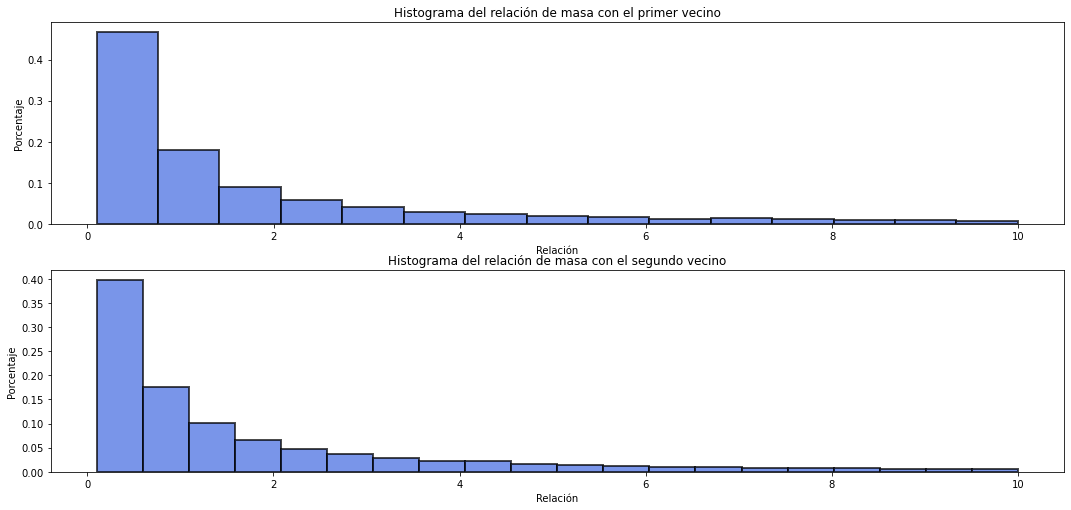

In [21]:
figure, axes = plt.subplots(2,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes[0].hist(var_1,bins=15,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[0].set_title('Histograma del relación de masa con el primer vecino')
axes[0].set_xlabel('Relación')
axes[0].set_ylabel('Porcentaje')

figure.tight_layout()

xmin = np.min(var_2)
xmax = np.max(var_2)

weights=np.ones_like(var_2)/float(len(var_2))
axes[1].hist(var_2,bins=20,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes[1].set_title('Histograma del relación de masa con el segundo vecino')
axes[1].set_xlabel('Relación')

plt.savefig('Histograma_relacion_masa.png')

axes[1].set_ylabel('Porcentaje')

plt.show()

In [24]:
var_1 = DATA['N_2']

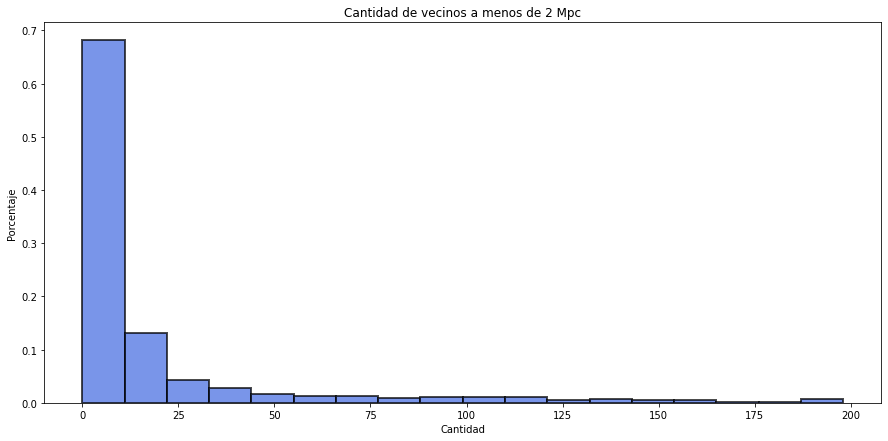

In [25]:
figure, axes = plt.subplots(1,figsize=(15,7))

xmin = np.min(var_1)
xmax = np.max(var_1)

weights=np.ones_like(var_1)/float(len(var_1))
axes.hist(var_1,bins=18,range=(xmin,xmax),histtype='bar',linestyle='-',color='royalblue',linewidth=2,label='z=0',alpha=0.7,edgecolor='k',weights=weights)
axes.set_title('Cantidad de vecinos a menos de 2 Mpc')
axes.set_xlabel('Cantidad')
axes.set_ylabel('Porcentaje')

# plt.savefig('Histograma_cantidad_vecinos.png')

plt.show()

In [37]:
DATA

GalaxyID_test     Mass_Host  SGNumber_Host    GroupID_test  \
4           21573586  1.665042e+12              0  28000000000002   
21          10873831  1.220330e+10              0  28000000002588   
60          12174564  4.412659e+10              2  28000000000029   
61          12176835  3.346803e+10              3  28000000000029   
65          12182126  1.332036e+10              7  28000000000029   
...              ...           ...            ...             ...   
10174        8679932  1.056090e+10              2  28000000000847   
10198        9194556  1.929747e+10              0  28000000001336   
10199        2979098  1.140433e+10              1  28000000001336   
10211        9625360  1.596157e+10              0  28000000001525   
10213        9672291  1.264538e+10              0  28000000001560   

       GalaxyID_V1  GalaxyID_V2       R_1       R_2    r_sep_1     r_sep_2  \
4         14916079     14895218  0.611993  1.416241   3.911029    8.801750   
21        59447030     12564159  0.030355  0.836762   3.829159   83.362687   
60        12182126     12176835  0.182853  0.546576  16.658711   43.180768   
61        18849992     12174564  0.291109  0.546576  12.586740   43.180768   
65        12174564      7137454  0.182853  0.544311  16.658711   71.247250   
...            ...          ...       ...       ...        ...         ...   
10174      8679399      2478576  0.136442  4.124689  12.776461  404.403308   
10198      2979098      4209797  0.125274  1.195994  11.771382  180.065701   
10199      9194556      3809751  0.125274  0.771940  11.771382   77.676717   
10211      3023464      9637443  0.080132  3.544065   8.947061  343.114736   
10213      3030139      2829356  0.055901  1.493894   8.493658  228.114626   

           mu_1      mu_2  N_1  N_2  N_3  
4      0.225328  0.132064    1    2    2  
21     0.107846  0.227372    2    2    8  
60     0.301867  0.758455    4    9   10  
61     8.014599  1.318470    6   10   11  
65     3.312718  0.112199    6   15   15  
...         ...       ...  ...  ...  ...  
10174  0.778753  0.372070    1    1    1  
10198  0.590975  0.817385    1    2    6  
10199  1.692118  0.136605    2    3    7  
10211  0.206036  1.457021    1    1    1  
10213  0.144510  0.276131    1    6    7  

[653 rows x 15 columns]

## 12) Graficar r2 vs r1 (scatter plot + medianas + percentiles 25th y 75th).

In [24]:
xvar = DATA['R_1'].values
yvar = DATA['R_2'].values

In [25]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,perc_low=perc_low,perc_high=perc_high)

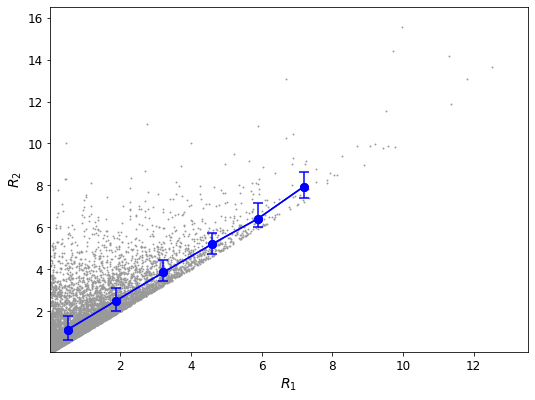

In [26]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$R_{1}$'
ylabel=r'$R_{2}$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
plt.savefig('scatter_R_1vsR_2.png')


plt.show()

## 13) Graficar scatter plot de r2 vs r1, coloreando según N2.

In [31]:
xvar = DATA['r_sep_1'].values
yvar = DATA['r_sep_2'].values

In [32]:
xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [33]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='N_2'
colors_var_label=r'$N_{2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-33-e8e913fb780f>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



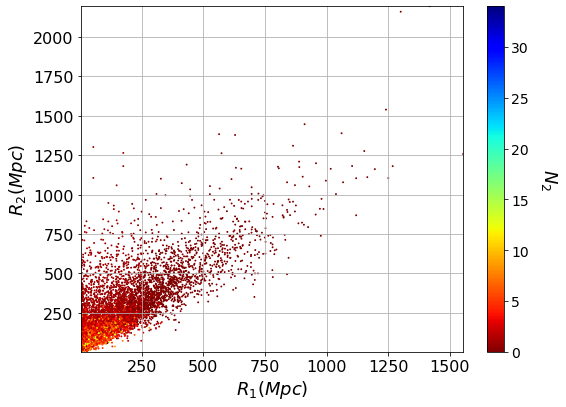

In [34]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R_{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_N_2).png')
plt.show()

## 14) Graficar scatter plot de r2 vs r1, coloreando según rsep2.

In [47]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [48]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='r_sep_1'
colors_var_label=r'$r_{Sep1}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-48-c34458be7fe9>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



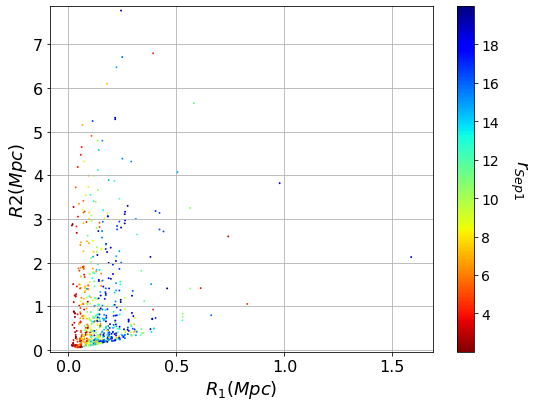

In [49]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_r_sep1).png')
plt.show()

In [50]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [51]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='r_sep_2'
colors_var_label=r'$r_{Sep2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-51-18a2fea8d121>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



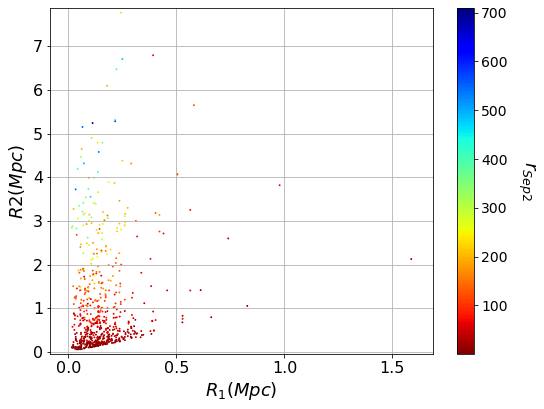

In [52]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_r_sep2).png')
plt.show()

## 15) Graficar  scatter plot de r2 vs r1, coloreando según μBGT.

In [53]:
xvar = DATA['R_1']
yvar = DATA['R_2']

xmin= min(xvar)
xmax= max(xvar)
ymin= min(yvar)
ymax= max(yvar)

In [54]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='mu_1'
colors_var_label=r'$\mu_{1}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-54-14aca0c44117>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



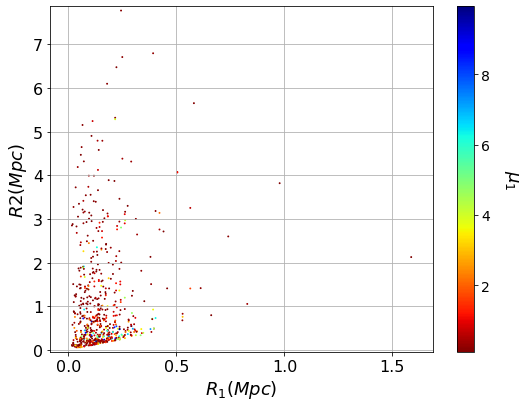

In [55]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

plt.savefig('scatter_R_1vsR_2(color_mu1).png')
plt.show()

In [56]:
# Colors representing some property  
# Define colormap to use
cmap = plt.get_cmap('jet_r')    # Add _r to the name of colormap to invert it.    
cmap.set_under('k')    # Color por debajo de mínimo

# Propiedad a usar para colorear
# Ojo!! Acá depende de la propiedad si tomar o no log10...
colors_var_key='mu_2'
colors_var_label=r'$\mu_{2}$'
colors_var= DATA[colors_var_key]
                                   
#---------------------------------------------------------------
# Esto es en caso de que se tome log y la variable para colorear sea cero
# En estos casos, se asigna el color negro (con el 'set_under' del principio)
mask_color=~(np.logical_or(np.isinf(colors_var),np.isnan(colors_var)))
#---------------------------------------------------------------

# Escaleo los colores "a mano". Es una escala lineal.
vmin=min(colors_var[mask_color])
vmax=max(colors_var[mask_color])
a=1./float(vmax-vmin)
b=-a*vmin
colors=(a*colors_var+b)   # Array de números que representan colores
facecolor=cmap(colors)    # Esto transforma "números" a 4-tuplas que representan colores

<ipython-input-56-2acb41f497fa>:4: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



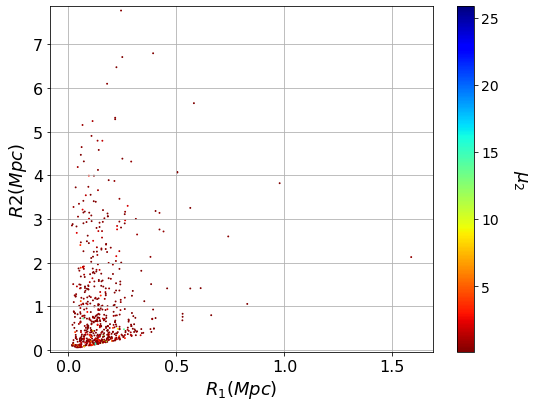

In [57]:
# Gráfico

# Etiquetas y ejes del grafico
fig,ax=plt.subplots(figsize=(8,6))

xlim=(xmin-0.1,xmax+0.1)
ylim=(ymin-0.1,ymax+0.1)

xlabel=r'$R_{1}(Mpc)$'
ylabel=r'$R{2}(Mpc)$'

ax.set_xlabel(xlabel,fontsize=18)
ax.set_ylabel(ylabel,fontsize=18)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=16)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

                        
# Scatter plot 'falso', para armar barra de referencia
sc_bar=ax.scatter(xvar,yvar,c=colors,vmin=vmin,vmax=vmax,cmap=cmap,s=0)
# Agrego barra de referencia para colres
cbar=fig.colorbar(mappable=sc_bar,ax=ax,orientation='vertical')
cbar.set_label(colors_var_label,fontsize=18,rotation=270,labelpad=30)
cbar.ax.tick_params(labelsize=14)

# scatter plot 'posta'
ax.scatter(xvar,yvar,marker='o',s=0.8,c=facecolor)
plt.grid(True)

# plt.savefig('scatter_R_1vsR_2(color_mu2).png')
plt.show()

In [35]:
DATA

GalaxyID_test    GroupID_test  GalaxyID_V1  GalaxyID_V2       R_1  \
0           9508202  28000000000002      9562859     14910180  0.257705   
1           9512113  28000000000002     21573586     14916079  0.357887   
2           9517736  28000000000002      9542932      9552226  0.677967   
3          14957972  28000000000002     14910180      9562859  0.506283   
4          21573586  28000000000002     14916079     14895218  0.611993   
...             ...             ...          ...          ...       ...   
3088       10365607  28000000002202     18478750     18181888  1.911730   
3089       10859653  28000000002570      9779252      9744960  1.526021   
3090       11104654  28000000002905      9034191     10942165  1.503464   
3091       11247394  28000000003127     18043220     13247553  2.053687   
3092       12002343  28000000004258      9319534     12155759  0.576453   

           R_2     r_sep_1     r_sep_2       mu_1      mu_2  N_1  N_2  N_3  
0     0.463580   21.223224   33.711917   0.315459  0.823968    3    3   10  
1     0.403526    2.255197   26.141135  12.378317  2.789177    3    8   11  
2     1.051229   56.695098   97.045011   1.722059  1.412398    1   12   17  
3     0.598623   28.819485   37.510623   1.158429  0.443508    3    3   12  
4     1.416241    3.911029    8.801750   0.225328  0.132064    1    2    2  
...        ...         ...         ...        ...       ...  ...  ...  ...  
3088  3.737239  212.966353  260.881095   2.058146  2.369121    0    1    1  
3089  5.217671  148.669482  531.640719   2.014763  1.325153    0    1    1  
3090  2.124332  167.615303  244.177300   1.657043  0.965701    0    1    2  
3091  2.741299  123.996389  206.631102   4.079843  2.085725    0    0    2  
3092  1.511624   67.695244  186.801965   2.021934  1.020740    1    6    9  

[3093 rows x 13 columns]

In [ ]:
# Fin